## Flexi Mini Project
# **International Cricket Data Analysis: *Tests+T20Is+ODIs***


---


#### Team Members:

1.   *Ameysingh Bayas     21070122517*
2.   *Rehanatik Shaikh    21070122515*
3.   *Devarsh Ukani       21070122513*
4.   *Abhishek Bhardwaj   21070122501*



In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=66e3b94d776f6c3fcf533ac565014e02124706044fc6c66d5a55a90877aff645
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
# Importing necessary libraries
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

In [3]:
# Using dummy data to see if spark is working as intended

# Create a dummy spark session
spark = SparkSession.builder.appName("PySparkTest").getOrCreate()

# Create a simple DataFrame
data = [("Rohit", 36), ("Dhoni", 42), ("Sachin", 50), ("Kohli", 34)]
columns = ["Name", "Age"]
df = spark.createDataFrame(data, columns)

# Show the DataFrame
df.show()

# Calculate the average age
avg_age = df.groupBy().avg("Age").collect()[0][0]
print("Average Age:", avg_age)

+------+---+
|  Name|Age|
+------+---+
| Rohit| 36|
| Dhoni| 42|
|Sachin| 50|
| Kohli| 34|
+------+---+

Average Age: 40.5


In [ ]:
# Connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark import SparkFiles
from pyspark.sql import SparkSession

# Create our first session to access our dataset
spark = SparkSession.builder.appName("PySparkCSVAccess").getOrCreate()

csv_file_path = "/content/drive/My Drive/Amey_Workspace/players.csv"  # This csv file will be given to worker nodes
spark.sparkContext.addFile(csv_file_path)

# Opening the file
csv_file_name = "players.csv"
df = spark.read.csv("file://" + SparkFiles.get(csv_file_name), header=True, inferSchema=True)

# Display the data from the CSV file
df.show()

+-----+-----+--------------------+------------+--------------------+----------+--------------------+-----+-------------+---+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+---------------------

In [ ]:
# Observing our dataset
summary = df.describe()
summary.show()

+-------+------------------+------------------+----------------+-----------+--------------------+----------+-------------------+-------+-------------+-----------------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+--------------------+-----------------+------------------+-------------------+-----------------+------------------+------------------+-------------------+-----------------+--------------------+-----------------+------------------+------------------+--------------------+-----------------+------------------+------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+--------------

In [ ]:
## Above, we did not get a proper idea of this dataset, therefore we will individually check the number of rows, columns etc

# Create a Spark session
spark = SparkSession.builder.appName("CricketDataInfo").getOrCreate()

num_rows = df.count() # No. of rows

num_columns = len(df.columns) # No. of columns

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 90308
Number of Columns: 177


In [ ]:
# Check the data types of all columns in the DataFrame
for column, data_type in df.dtypes:
    print(f"Column '{column}' has data type: {data_type}")

Column '_c0' has data type: int
Column 'ID' has data type: int
Column 'NAME' has data type: string
Column 'COUNTRY' has data type: string
Column 'Full name' has data type: string
Column 'Birthdate' has data type: string
Column 'Birthplace' has data type: string
Column 'Died' has data type: string
Column 'Date_of_death' has data type: string
Column 'Age' has data type: int
Column 'Major teams' has data type: string
Column 'Batting style' has data type: string
Column 'Bowling style' has data type: string
Column 'Other' has data type: string
Column 'AWARDS' has data type: string
Column 'BATTING_Tests_Mat' has data type: string
Column 'BATTING_Tests_Inns' has data type: string
Column 'BATTING_Tests_NO' has data type: string
Column 'BATTING_Tests_Runs' has data type: string
Column 'BATTING_Tests_HS' has data type: string
Column 'BATTING_Tests_Ave' has data type: string
Column 'BATTING_Tests_BF' has data type: string
Column 'BATTING_Tests_SR' has data type: string
Column 'BATTING_Tests_100' 

#### Here, all the columns that contain statistics (like run rate, average etc) are in string format. For easier calculation, we will them it to integer format

In [ ]:
from pyspark.sql.types import IntegerType

# List of columns to NOT convert
columns_to_exclude = ["_c0", "ID", "NAME", "COUNTRY", "Full name", "Birthdate", "Birthplace", "Died", "Date_of_death", "Age", "Major teams", "Batting style", "Bowling style", "Other"]

for column in df.columns:
    if column not in columns_to_exclude:
        df = df.withColumn(column, df[column].cast(IntegerType()))

df.show()

+-----+-----+--------------------+------------+--------------------+----------+--------------------+-----+-------------+---+--------------------+--------------+--------------------+--------------------+------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+---------------------

In [ ]:
# Let's see how many total teams have been mentioned in the dataset (including domestic and private leagues)
from pyspark.sql.functions import split, explode

# Creating the session to count the total number of teams
spark = SparkSession.builder.appName("TotalTeamsCount").getOrCreate()

# We will create an array of teams and then print the length of that array (separated by ,)
teams_array = df.select("Major teams").withColumn("teams", split(df["Major teams"], ","))

# Explode the array to create a row for each team
exploded_teams = teams_array.select(explode("teams").alias("team"))

total_teams_count = exploded_teams.select("team").distinct().count()

# Show the total number of teams
print(f"Total Number of Teams: {total_teams_count}")

Total Number of Teams: 7898


In [ ]:
# Now let's check the teams related to India (India A etc)

spark = SparkSession.builder.appName("IndiaRelatedTeams").getOrCreate()

teams_array = df.select("Major teams").withColumn("teams", split(df["Major teams"], ","))

exploded_teams = teams_array.select(explode("teams").alias("team"))

indian_teams = exploded_teams.filter(col("team").like("%India%"))

indian_teams_count = indian_teams.select("team").distinct().count()

print(f"Total Number of Indian Teams: {indian_teams_count}")

# Select and display 20 Indian teams
indian_teams_20 = indian_teams.select("team").distinct().limit(20)
indian_teams_20.show(truncate=False)

Total Number of Indian Teams: 182
+--------------------------------------+
|team                                  |
+--------------------------------------+
|['India Under-19s                     |
|Cricket Club of India                 |
|['Indian Oil Corporation XI           |
|"['India Under-21s Women              |
| 'Swami Shraddhanand College (India)']|
| 'India Under-19s']                   |
| 'India Under-21s Women']             |
|India Under-17s                       |
|['India Senior Women                  |
|Dubai Indians                         |
|['India Green Women                   |
|['India Under-21s Women               |
|['India A Women                       |
| 'Europeans (India)']                 |
| ""Punjab Governor's XI (India)""]"   |
|Northern India                        |
|"['India Green                        |
| 'India Blue Women                    |
|"['India Under-19s                    |
|['Air India Red                       |
+----------------------

In [ ]:
# Listing the players who played for the Indian team (Main Indian team)
from pyspark.sql.functions import col

players_for_team_india = df.filter(
    (col("Major teams").contains("India")) & (col("COUNTRY") == "India")
)

players_for_team_india.show()

+-----+------+-------------------+-------+--------------------+----------+--------------------+-----+-------------+---+--------------------+--------------+--------------------+-----------+--------------------+--------------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+------------------

In [ ]:
# Showing the players born after 1955 annd whose Country was India itself
from pyspark.sql.functions import col

# Filter players who have played for the major team "India," were born after 1955, and have the country as "India"
players_for_team_india_filtered = players_for_team_india.filter(
    (col("Birthdate") >= "1955-01-01") & (col("COUNTRY") == "India")
)

# Display the relevant player information
players_for_team_india_filtered.show()


+-----+------+--------------------+-------+--------------------+----------+--------------------+-----+-------------+---+--------------------+--------------+--------------------+--------------------+------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+----------------------+--

In [ ]:
# Now, let's only keep male players who have played for the main team from their country for the top 8 teams (the most famous ones)
# Also we will only keep the ones born after 1950
from pyspark.sql.functions import col

countries_to_include = ["India", "Australia", "South Africa", "Pakistan", "England", "New Zealand", "Sri Lanka", "West Indies"]

filtered_players = df.filter(
    (col("COUNTRY").isin(countries_to_include)) &
    (col("Major teams") == col("COUNTRY")) &
    (col("Birthdate") >= "1951-01-01")
)

filtered_players.show()

+-----+-------+--------------------+------------+--------------------+----------+--------------------+-----+-------------+---+------------+--------------+--------------------+------+------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+----------------------+------------------

In [ ]:
from pyspark.sql.functions import col
# Now, we'll make a small dataset containing only the international players (main 8 teams)

countries_and_teams = [
    ("India", "India"),
    ("Australia", "Australia"),
    ("South Africa", "South Africa"),
    ("Pakistan", "Pakistan"),
    ("England", "England"),
    ("New Zealand", "New Zealand"),
    ("Sri Lanka", "Sri Lanka"),
    ("West Indies", "West Indies")
]


combined_filter = col("COUNTRY").isNull()

for country, team in countries_and_teams:
    filter_condition = (col("COUNTRY") == country) & col("Major teams").like(f"%{team}%")
    combined_filter = combined_filter | filter_condition

filtered_players = df.filter(
    combined_filter &
    (col("Birthdate") >= "1951-01-01")
)

# Display the relevant player information
filtered_players.show()

+-----+-----+------------------+------------+--------------------+----------+--------------------+-----+-------------+---+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+-----------------------

In [ ]:
# We will search for Sachin Tendulkar in this list to verify that the filtering happened properly
sachin_tendulkar = filtered_players.filter(col("NAME").like("%Sachin Tendulkar%"))

# Display the information for Sachin Tendulkar
sachin_tendulkar.show()

+-----+-----+----------------+-------+--------------------+----------+--------------------+-----+-------------+---+--------------------+--------------+--------------------+-----+------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+----------------------+----------------------

In [ ]:
# Now, let's remove unneccessary columns from our dataframe
# We don't need _c0, ID, died, date_of_death, full name column
columns_to_drop = ["_c0", "ID", "died", "date_of_death", "Full name"]

filtered_players = filtered_players.drop(*columns_to_drop)

filtered_players.show()

+------------------+------------+----------+--------------------+---+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+----------------------+------------------------+---

In [ ]:
# We will search for Sachin Tendulkar in this list to verify that the filtering happened properly
sachin_tendulkar = filtered_players.filter(col("NAME").like("%Sachin Tendulkar%"))

# Display the information for Sachin Tendulkar
sachin_tendulkar.show()

+----------------+-------+----------+--------------------+---+--------------------+--------------+--------------------+-----+------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+----------------------+------------------------+----------------------+-----------------------+---

In [ ]:
# Let's check the players who have scored the maximum runs in test matches
players_with_max_runs_in_test = filtered_players.orderBy(col("BATTING_Tests_Runs").desc()).limit(10)

# Display the player(s) with the maximum runs in test matches
players_with_max_runs_in_test.show()

+------------------+-----------+----------+--------------------+---+--------------------+-------------+--------------------+-----+--------------------+-----------------+--------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+----------------------+------------------------+----------------------+------

In [ ]:
from pyspark.sql.functions import col, desc

# Find the player with the highest number of test matches
top_player = filtered_players.select("*", col("BATTING_Tests_Mat").cast("int")).orderBy(desc("BATTING_Tests_Mat")).limit(20)

# Display the top player with the highest number of test matches
top_player.show()

+--------------------+------------+----------+--------------------+---+--------------------+--------------+--------------------+--------------+--------------------+--------------------+--------------------+----------------+--------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+----------------------+------------------------+-----------

In [ ]:
# Dropping unnecessary columns
columns_to_drop = ["_c0", "ID", "Died", "Date_of_death", "Full name", "Other", "Birthdate", "Age"]
filtered_players = filtered_players.drop(*columns_to_drop)

# Show the DataFrame with the columns removed
filtered_players.show()

+------------------+------------+--------------------+--------------------+--------------+--------------------+------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+----------------------+------------------------+----------------------+-----------------------+-----------------

In [ ]:
# Let's observe the bowlers with most wickets in tests, odis, and t20s combined
from pyspark.sql.functions import col

# Calculate the total wickets by adding wickets in Tests, ODIs, and T20s
filtered_players_with_wickets = filtered_players.withColumn("Total_Wickets",
    col("BOWLING_Tests_Wkts").cast("int") + col("BOWLING_ODIs_Wkts").cast("int") + col("BOWLING_T20Is_Wkts").cast("int")
)

# Sort the DataFrame in descending order based on the total wickets
sorted_players_by_wickets = filtered_players_with_wickets.orderBy(col("Total_Wickets").desc())

# Show the top players with the most wickets
sorted_players_by_wickets.select("NAME", "Total_Wickets").show()

+-----------------+-------------+
|             NAME|Total_Wickets|
+-----------------+-------------+
| Sachin Tendulkar|         9354|
|   James Anderson|          862|
|    Chaminda Vaas|          761|
|   Daniel Vettori|          705|
|       Dale Steyn|          696|
|     Stuart Broad|          680|
| Kumar Sangakkara|          594|
|   Lasith Malinga|          520|
|Sanath Jayasuriya|          440|
|      Trent Boult|          430|
|     Graeme Swann|          410|
|   Mitchell Starc|          387|
|      Nathan Lyon|          366|
|     Rohit Sharma|          327|
|   Jhulan Goswami|          314|
| Nuwan Kulasekara|          313|
|    Kagiso Rabada|          307|
|   Steve Harmison|          303|
|     Irfan Pathan|          301|
|    Jerome Taylor|          291|
+-----------------+-------------+
only showing top 20 rows



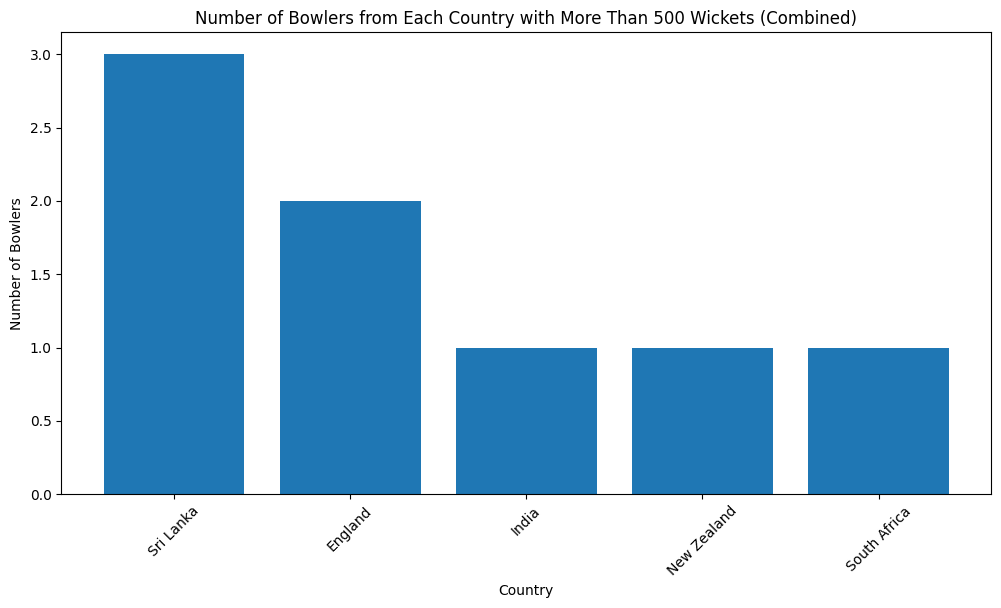

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("CricketStatsVisualization").getOrCreate()

# Assuming you have a DataFrame named "filtered_players" containing the filtered dataset

# Filter players who have taken more than 500 wickets combined in Tests, ODIs, and T20s
filtered_bowlers = filtered_players.filter(
    (col("BOWLING_Tests_Wkts") + col("BOWLING_ODIs_Wkts") + col("BOWLING_T20Is_Wkts")) > 500
)

# Group the data by country and count the number of bowlers who meet the criterion
country_bowlers_counts = filtered_bowlers.groupBy("COUNTRY").count().orderBy("count", ascending=False)

# Convert the PySpark DataFrame to a Pandas DataFrame for visualization
country_bowlers_counts_pd = country_bowlers_counts.toPandas()

# Create a bar chart to visualize the count of bowlers from each country
plt.figure(figsize=(12, 6))
plt.bar(country_bowlers_counts_pd["COUNTRY"], country_bowlers_counts_pd["count"])
plt.xlabel("Country")
plt.ylabel("Number of Bowlers")
plt.title("Number of Bowlers from Each Country with More Than 500 Wickets (Combined)")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("CricketAllRounders").getOrCreate()

# Assuming you have a DataFrame named "filtered_players" containing the filtered dataset

# Filter players who meet the criteria (minimum 5000 runs and 500 wickets combined)
all_rounders = filtered_players.filter(
    (col("BATTING_Tests_Runs") + col("BATTING_ODIs_Runs") + col("BATTING_T20Is_Runs") >= 5000) &
    (col("BOWLING_Tests_Wkts") + col("BOWLING_ODIs_Wkts") + col("BOWLING_T20Is_Wkts") >= 250)
)

# Select relevant columns for analysis
selected_columns = [
    "NAME",
    "COUNTRY",
    "BATTING_Tests_Runs",
    "BATTING_ODIs_Runs",
    "BATTING_T20Is_Runs",
    "BOWLING_Tests_Wkts",
    "BOWLING_ODIs_Wkts",
    "BOWLING_T20Is_Wkts"
]

# Calculate the total runs and wickets combined
all_rounders = all_rounders.withColumn(
    "TotalRuns",
    col("BATTING_Tests_Runs") + col("BATTING_ODIs_Runs") + col("BATTING_T20Is_Runs")
).withColumn(
    "TotalWickets",
    col("BOWLING_Tests_Wkts") + col("BOWLING_ODIs_Wkts") + col("BOWLING_T20Is_Wkts")
).select(selected_columns + ["TotalRuns", "TotalWickets"])

# Order the all-rounders by the total runs and wickets combined
all_rounders = all_rounders.orderBy(["TotalRuns", "TotalWickets"], ascending=[False, False])

# Show the top all-rounders
all_rounders.show()

+-----------------+-----------+------------------+-----------------+------------------+------------------+-----------------+------------------+---------+------------+
|             NAME|    COUNTRY|BATTING_Tests_Runs|BATTING_ODIs_Runs|BATTING_T20Is_Runs|BOWLING_Tests_Wkts|BOWLING_ODIs_Wkts|BOWLING_T20Is_Wkts|TotalRuns|TotalWickets|
+-----------------+-----------+------------------+-----------------+------------------+------------------+-----------------+------------------+---------+------------+
|Sanath Jayasuriya|  Sri Lanka|              6973|            13430|               629|                98|              323|                19|    21032|         440|
|      Chris Gayle|West Indies|              7214|            10151|              1627|                73|              165|                17|    18992|         255|
|   Daniel Vettori|New Zealand|              4531|             2253|               205|               362|              305|                38|     6989|         705

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("CricketDataSorting").getOrCreate()

# Assuming you have a DataFrame named "filtered_players" containing the filtered dataset

# Sort the data by the highest scores in T20 format in descending order and limit to the top 20
top_20_t20_scores = filtered_players.orderBy(col("BATTING_T20Is_HS").cast("int"), ascending=False).limit(20)

# Show the top 20 highest scores in T20s
top_20_t20_scores.show()

+------------------+------------+--------------------+--------------------+--------------+--------------------+------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+---------------+-----------------+---------------+----------------+---------------+---------------+----------------+---------------+---------------+---------------+---------------+---------------+-----------------+------------------+----------------+------------------+----------------+-----------------+----------------+----------------+-----------------+----------------+----------------+----------------+----------------+----------------+-----------------------+------------------------+----------------------+------------------------+----------------------+-----------------------+-----------------

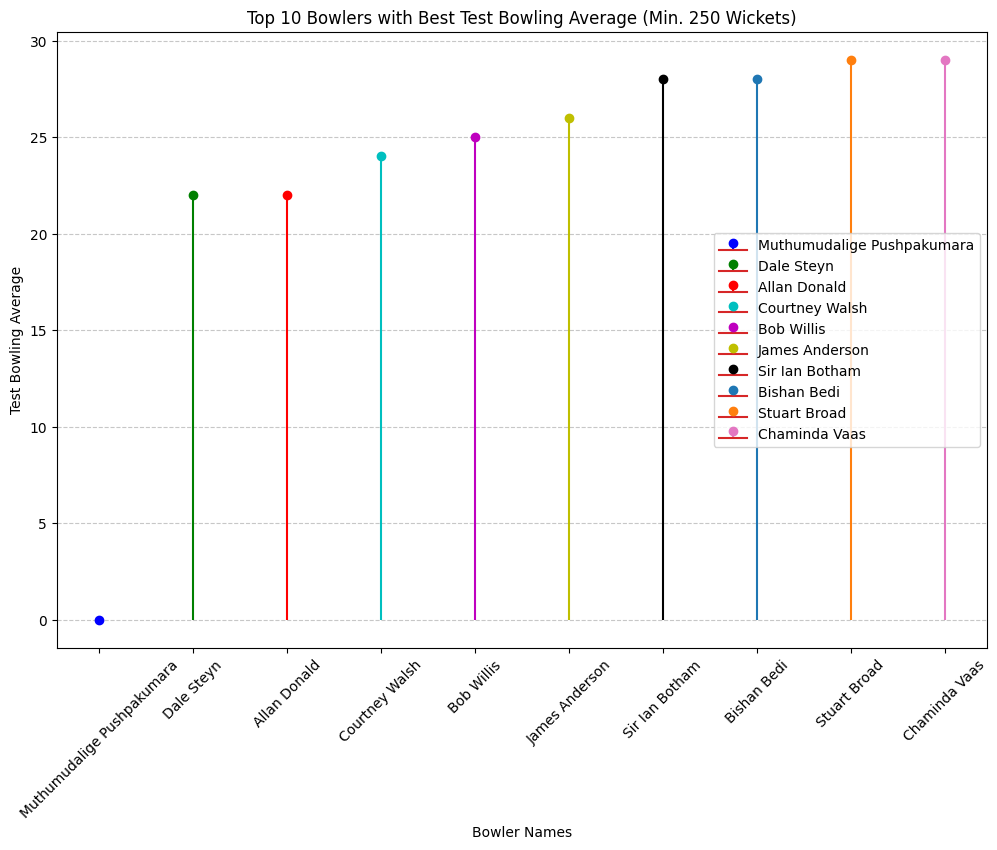

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("CricketDataVisualization").getOrCreate()

# Assuming you have a DataFrame named "filtered_players" containing the filtered dataset

# Filter bowlers with more than 250 wickets in Test format
filtered_bowlers = filtered_players.filter(col("BOWLING_Tests_Wkts").cast("int") > 250)

# Filter out rows with None values in the "BOWLING_Tests_Ave" column
filtered_bowlers = filtered_bowlers.filter(col("BOWLING_Tests_Ave").isNotNull())

# Sort the filtered bowlers by the best average in Test format in ascending order
sorted_bowlers = filtered_bowlers.orderBy(col("BOWLING_Tests_Ave").cast("double")).limit(10)

# Extract bowler names and their Test bowling averages
bowler_names = sorted_bowlers.select("NAME").rdd.map(lambda row: row[0]).collect()
bowling_averages = sorted_bowlers.select("BOWLING_Tests_Ave").rdd.map(lambda row: float(row[0])).collect()

# Define colors for the data points
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:pink']

# Create a colorful lollipop chart
plt.figure(figsize=(12, 8))
for i in range(len(bowler_names)):
    plt.stem(bowler_names[i], bowling_averages[i], linefmt=colors[i], markerfmt='o', label=bowler_names[i])

plt.xlabel("Bowler Names")
plt.ylabel("Test Bowling Average")
plt.title("Top 10 Bowlers with Best Test Bowling Average (Min. 250 Wickets)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

### References
1. https://medium.com/@aieeshashafique/exploratory-data-analysis-using-pyspark-dataframe-in-python-bd55c02a2852
2. https://spark.apache.org/docs/latest/api/python/getting_started/install.html
3. https://towardsdatascience.com/pyspark-on-google-colab-101-d31830b238be

### ESPN dataset was used for this project
https://data.world/raghav333/cricket-players-espn
